In [1]:
# Importing packages 
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from datetime import datetime

%matplotlib inline

In [23]:
cwd = os.getcwd()
cwd

'C:\\Users\\wilsonjo\\Documents'

In [2]:
os.chdir('C:\\Users\\wilsonjo\\Documents')

In [3]:
df_features = pd.read_csv('DengAI_Predicting_Disease_Spread_-_Training_Data_Features.csv')
df_labels = pd.read_csv('DengAI_Predicting_Disease_Spread_-_Training_Data_Labels.csv')

In [4]:
# Top 5 records, plus headers, for training data features
df_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [5]:
# Top 5 records, plus headers, for training data labels
df_labels.head()


,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [27]:
# Looking for missing values

type(df_features)

# Size of the df
df_features.shape # 1456 x 24


# Inspecting the feature data for any missing values
df_features.isnull().values.ravel().sum() # There are 548


# Are there any missing data to the lables data?
df_labels.isnull().values.ravel().sum() # There are 0

0

In [28]:
# Getting a description of the data
print(df_features.describe())

# We can clearly see where the is missing data. All data should be the same count as year or week of year, 
# but ndvi_ne is missing nearly 200, while reanalysis_dew_point_temp_k is missing only 10. This means we might have to
# us different missing value strategies

              year   weekofyear      ndvi_ne      ndvi_nw      ndvi_se  \
count  1456.000000  1456.000000  1262.000000  1404.000000  1434.000000   
mean   2001.031593    26.503434     0.142294     0.130553     0.203783   
std       5.408314    15.019437     0.140531     0.119999     0.073860   
min    1990.000000     1.000000    -0.406250    -0.456100    -0.015533   
25%    1997.000000    13.750000     0.044950     0.049217     0.155087   
50%    2002.000000    26.500000     0.128817     0.121429     0.196050   
75%    2005.000000    39.250000     0.248483     0.216600     0.248846   
max    2010.000000    53.000000     0.508357     0.454429     0.538314   

           ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
count  1434.000000           1443.000000            1446.000000   
mean      0.202305             45.760388             298.701852   
std       0.083903             43.715537               1.362420   
min      -0.063457              0.000000             294.635714  

In [6]:
# Turning the week_start_date into a date
df_features['week_start_date'] = pd.to_datetime(df_features['week_start_date'])

In [7]:
# Tells us how the columns were inferred
df_features.dtypes

city                                             object
year                                              int64
weekofyear                                        int64
week_start_date                          datetime64[ns]
ndvi_ne                                         float64
ndvi_nw                                         float64
ndvi_se                                         float64
ndvi_sw                                         float64
precipitation_amt_mm                            float64
reanalysis_air_temp_k                           float64
reanalysis_avg_temp_k                           float64
reanalysis_dew_point_temp_k                     float64
reanalysis_max_air_temp_k                       float64
reanalysis_min_air_temp_k                       float64
reanalysis_precip_amt_kg_per_m2                 float64
reanalysis_relative_humidity_percent            float64
reanalysis_sat_precip_amt_mm                    float64
reanalysis_specific_humidity_g_per_kg           

In [8]:
# Takes the city column and codes a 0 for Iquito and 1 for SJ in separate columns at the end of the df.

df_dummy = pd.get_dummies(df_features, columns = ['city'])

In [9]:
# Inspecting how the one hot encoding worked
df_dummy.head()

,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,city_iq,city_sj
0,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,0,1
1,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,0,1
2,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,0,1
3,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,0,1
4,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,0,1


In [49]:
# A way to see how many are missing from each column
# We don't have to worry about coding the missing values as NaNs, as they were inferred as such
 
print(df_dummy.isnull().sum())
    
# A quick scan of the data set shows that there are several weeks for which we have no feature data. 
# These will likely have to be excluded


year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_min_temp_c                        14
station_pr

We have three routes we can follow for treating the missing values
1. We can exclude all observations with missing values
2. We can exclude just the rows that are largely missing values, and impute the rest of the values
3. We can impute all of the missing values

Since we don't know what the impact of any of these options might be, we should pursue them all independently.

### Option 1

In [36]:
list(df_labels.columns.values)
df_labels.iloc[:, 3]

0        4
1        5
2        4
3        3
4        6
5        2
6        4
7        5
8       10
9        6
10       8
11       2
12       6
13      17
14      23
15      13
16      21
17      28
18      24
19      20
20      40
21      27
22      42
23      33
24      43
25      37
26      57
27      71
28      44
29      56
        ..
1426     4
1427     4
1428     1
1429     0
1430     0
1431    10
1432     9
1433    17
1434    16
1435    11
1436    12
1437    19
1438    15
1439    12
1440    12
1441    16
1442     9
1443     4
1444     9
1445     6
1446     8
1447     4
1448     2
1449     7
1450     6
1451     5
1452     8
1453     1
1454     1
1455     4
Name: total_cases, dtype: int64

Change iloc to loc for the purposes of error proofing

In [21]:
# Lets create a data set with no missing values, by exclusion
# Since we are excluding some rows, we will want to include the dependent variable as well
df_dummy['total_cases'] = df_labels.iloc[:, 3]
df_features_opt1 = df_dummy.dropna()

In [11]:
df_features_opt1.shape # 1199 x 26, so we have dropped 257 observations, or nearly 


(1199, 26)

In [13]:
print(pd.isnull(df_features_opt1).sum()) # we see that there are no more null values
#df_features_opt1.isnull().any() austin's preferred, cooler way

year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
city_iq    

In [14]:
df_graph1 = df_features_opt1.loc[:, ['total_cases','city_iq', 'week_start_date']]

In [15]:
df_graph1_filt = df_graph1.loc[df_graph1['city_iq'] == 1,['total_cases', 'week_start_date']].set_index('week_start_date')

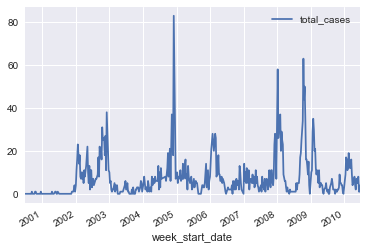

In [35]:
df_graph1_filt.plot(kind = 'line')

In [ ]:
df_graph1_filt.query('index >=2005 & index <= 2007').plot(kind = 'line')

In [36]:
df_graph2 = df_features_opt1.loc[:, ['total_cases','city_sj', 'week_start_date']]

In [37]:
df_graph2_filt = df_graph2.loc[df_graph2['city_sj'] == 1,['total_cases', 'week_start_date']].set_index('week_start_date')

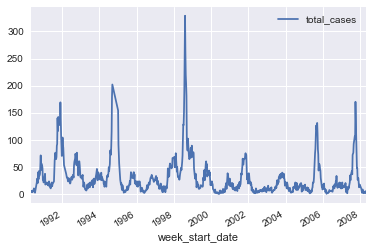

In [38]:
df_graph2_filt.plot(kind = 'line')

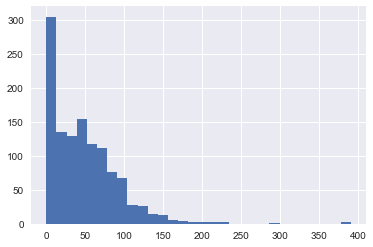

In [30]:
# Univariate Analyses
_=plt.hist(df_features_opt1['precipitation_amt_mm'], bins = 30)

In [18]:
# Creating the Option 1 DF but not one hot encoding the city variable. This is for seaborn
df_features['total_cases'] = df_labels.iloc[:, 3]
df_features_opt1_nodummy = df_features.dropna()

In [32]:
# coding three variables simultaneously
# we discretize the number of cases 
df_features_opt1['disc_totalcases'] = pd.qcut(df_features_opt1['total_cases'], [0,0.33, 0.66, 1], labels = ['First Thirtile', 'Second Thirtile', 'Last Thirtile'])

C:\Users\wilsonjo\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


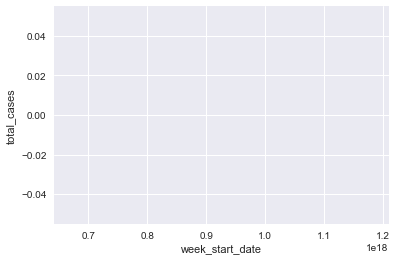

In [20]:
sns.tsplot(df_features_opt1_nodummy, time = 'week_start_date', value = 'total_cases')

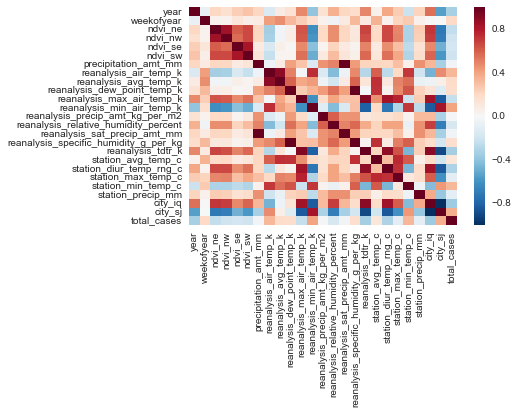

In [24]:
# Respecting Austin's time by only getting into correlations a little bit
sns.heatmap(df_features_opt1.corr())

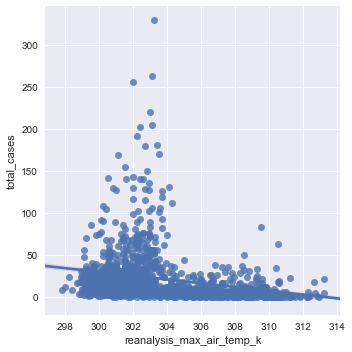

In [40]:
sns.lmplot(x = 'reanalysis_max_air_temp_k', y = 'total_cases', data = df_features_opt1)

In [62]:
df_features_opt1.dtypes

year                                              int64
weekofyear                                        int64
week_start_date                          datetime64[ns]
ndvi_ne                                         float64
ndvi_nw                                         float64
ndvi_se                                         float64
ndvi_sw                                         float64
precipitation_amt_mm                            float64
reanalysis_air_temp_k                           float64
reanalysis_avg_temp_k                           float64
reanalysis_dew_point_temp_k                     float64
reanalysis_max_air_temp_k                       float64
reanalysis_min_air_temp_k                       float64
reanalysis_precip_amt_kg_per_m2                 float64
reanalysis_relative_humidity_percent            float64
reanalysis_sat_precip_amt_mm                    float64
reanalysis_specific_humidity_g_per_kg           float64
reanalysis_tdtr_k                               

### Option 2

In [49]:
# Finding the minimum number of values 
df_features.apply(lambda x: x.count(), axis=1).min()

4

In [62]:
sorted(df_features.apply(lambda x: x.count(), axis=1)) # Anything greater than 8 looks like a good choice

[4,
 4,
 4,
 4,
 4,
 8,
 8,
 8,
 8,
 8,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,


In [63]:
# Getting rid of all rows whose number of values is equivalent to 4
df_features_opt2 = df_features[df_features.apply(lambda x: x.count(), axis=1) > 8]

In [64]:
# What does the missing data look like now?
df_features_opt2.shape

(1446, 24)

In [75]:
df_numeric_feat = df_features_opt2.iloc[:, 5:]

In [79]:
# imputing missing values for 
from sklearn.preprocessing import Imputer
imputer = Imputer()
df_numeric_feat = df_features_opt2.iloc[:, 5:]
df_numeric_feat = imputer.fit_transform(df_numeric_feat)
df_num_feat_arr = np.array(df_numeric_feat)


AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [94]:
for col in df_num_feat_arr:
    print(col, df_num_feat_arr[col].dtypes)

IndexError: arrays used as indices must be of integer (or boolean) type

In [81]:
df_features_opt2 = np.concatenate((df_features_opt2.iloc[:,0:5], df_numeric_feat), axis=0)

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [85]:
print(df_numeric_feat.isnull().sum())

AttributeError: 'numpy.ndarray' object has no attribute 'isnull'

In [ ]:
df_features_series = Series.from_csv('DengAI_Predicting_Disease_Spread_-_Training_Data_Features.csv')